# Team Member Name: Sumanto Kar

# Title of the Block:
# **Analog Ring Oscillator with Magic**




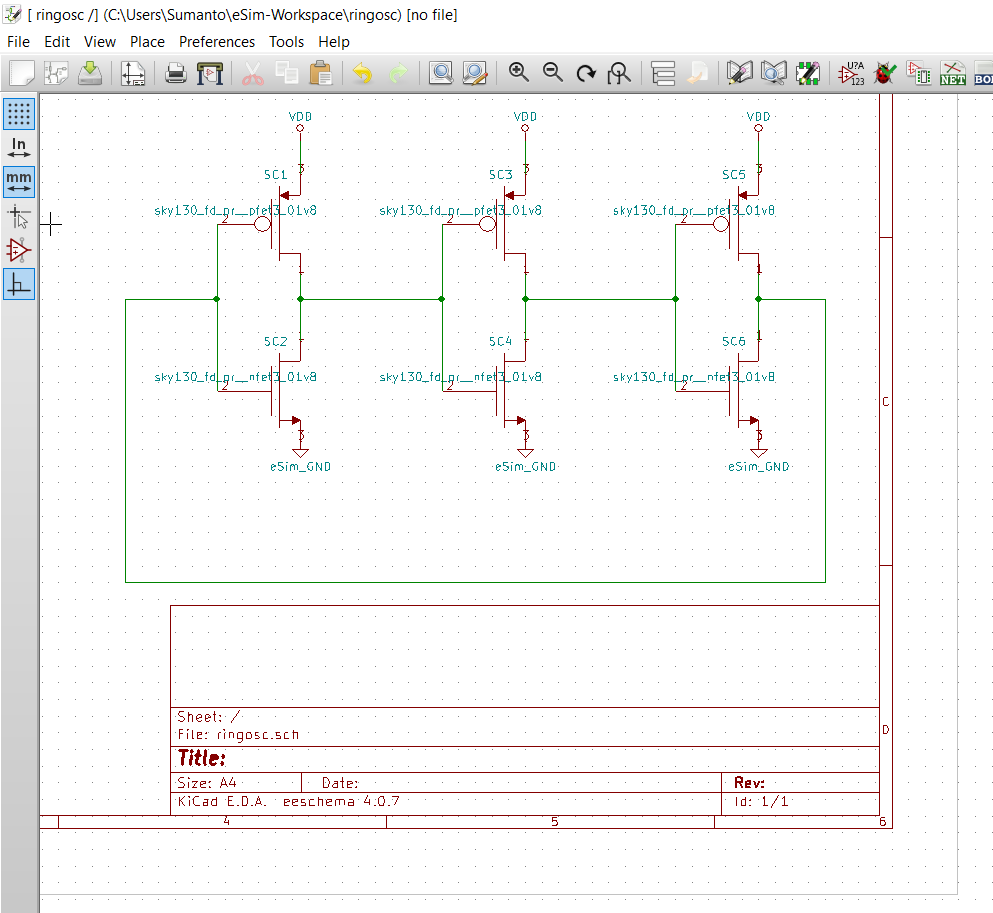

## Install dependencies

In [2]:
import os

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✨🍰✨ Everything looks OK!


In [3]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - open_pdks.sky130a
  - magic
  - gdstk
  - cairosvg
  - pyspice

Overwriting environment.yml


In [3]:
!mamba env update -n base -f environment.yml

[+] 0.0s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.3s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.4s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.5s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  litex-hub/noarch                                  
[+] 0.6s
litex-hub/linux-64    ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.7s
litex-hub/linux-64    ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.8s
litex-hub/linux-64    ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.9s
litex-hub/

In [4]:
import os

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  import condacolab
  CONDA_PREFIX = condacolab.PREFIX

## Draw a MOSFET with magic

In [19]:
%%script magic -dnull -noconsole -rcfile {CONDA_PREFIX}/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc
cellname rename (UNNAMED) nmosfet
box -1000nm -1000nm 1500nm 1500nm
paint pwell

box 0 0 950nm 650nm
paint ndiffusion

box 400nm -600nm 550nm 1200nm
paint polysilicon

box 0 0 400nm 650nm
label source
port make 3

box -600nm -600nm -500nm -500nm
label VSUBS
port make 4

box 550nm 0 950nm 650nm
label drain
port make 1

box 400nm -600nm 550nm 0
label gate
port make 2

extract
ext2spice lvs
ext2spice cthresh 0
ext2spice

gds labels no
gds write nmosfet.gds


Magic 8.3 revision 389 - Compiled on Wed Apr 12 10:38:02 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.406-0-g0c37b7c
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:   2.500 x 2.500   (-1.000, -1.000), ( 1.500,  1.500)  6.250     
lambda:   250.00 x 250.00  (-100.00, -100.00), ( 150.00,  150.00)  62500.00  
internal:    500 x 500     (  -200, -200  ), (   300,  300  )  250000    
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (

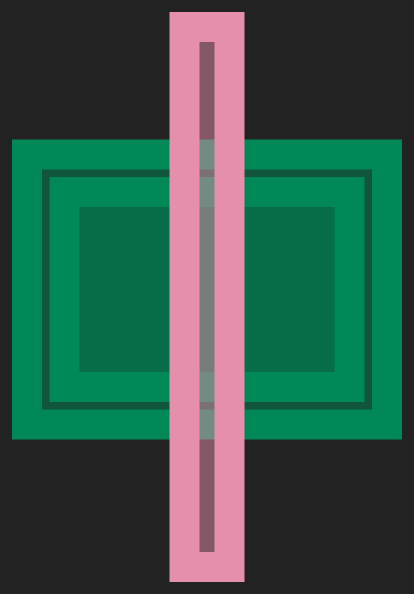

In [20]:
import gdstk
import cairosvg
from IPython.display import Image

library = gdstk.read_gds('nmosfet.gds')
top_cells = library.top_level()
top_cells[0].write_svg('nmosfet.svg')
cairosvg.svg2png(url='nmosfet.svg', write_to='nmosfet.png', scale=30.0)
Image('nmosfet.png')

In [39]:
%%script magic -dnull -noconsole -rcfile {CONDA_PREFIX}/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc
cellname rename (UNNAMED) pmosfet

box -1000nm -1000nm 1500nm 1500nm
paint nwell

box 0 0 950nm 650nm
paint pdiffusion

box 400nm -600nm 550nm 1200nm
paint polysilicon

box 0 0 400nm 650nm
label source
port make 3

box -600nm -600nm -500nm -500nm
label VSUBS
port make 4



box 550nm 0 950nm 650nm
label drain
port make 1

box 400nm -600nm 550nm 0
label gate
port make 2

extract
ext2spice lvs
ext2spice cthresh 0
ext2spice

gds labels no
gds write pmosfet.gds


Magic 8.3 revision 389 - Compiled on Wed Apr 12 10:38:02 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.406-0-g0c37b7c
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:   2.500 x 2.500   (-1.000, -1.000), ( 1.500,  1.500)  6.250     
lambda:   250.00 x 250.00  (-100.00, -100.00), ( 150.00,  150.00)  62500.00  
internal:    500 x 500     (  -200, -200  ), (   300,  300  )  250000    
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (

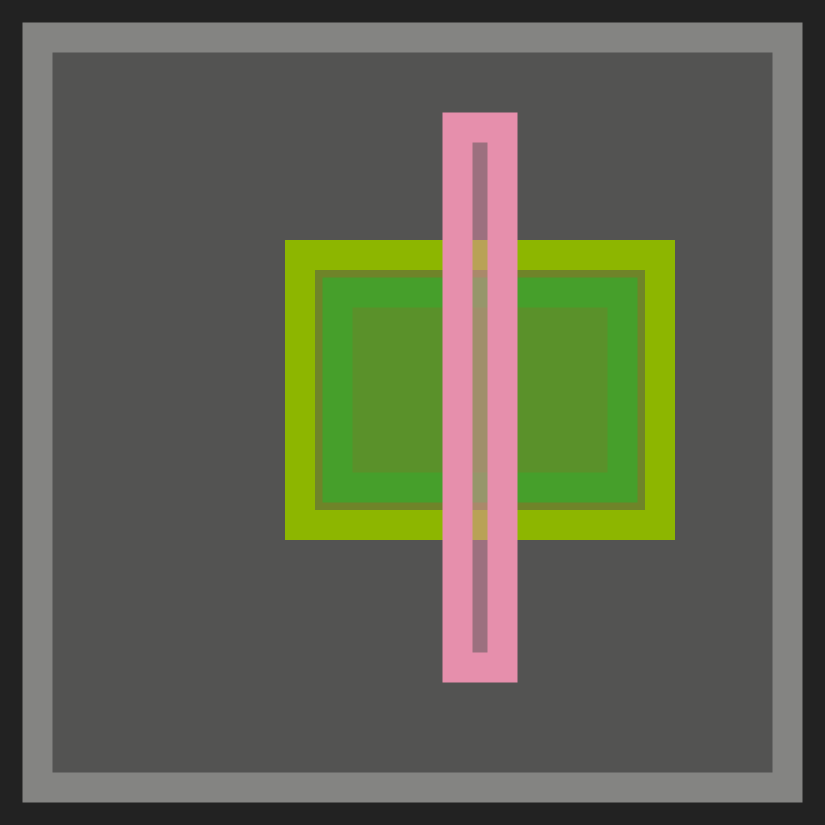

In [40]:
import gdstk
import cairosvg
from IPython.display import Image

library = gdstk.read_gds('pmosfet.gds')
top_cells = library.top_level()
top_cells[0].write_svg('pmosfet.svg')
cairosvg.svg2png(url='pmosfet.svg', write_to='pmosfet.png', scale=30.0)
Image('pmosfet.png')

In [49]:
%%script magic -dnull -noconsole -rcfile {CONDA_PREFIX}/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc
cellname rename (UNNAMED) cap

box -1000nm -1000nm 1500nm 1500nm
paint nwell

box 0 0 950nm 650nm
paint metal1

box 0 0 950nm 650nm
paint metal2



extract
ext2spice lvs
ext2spice cthresh 0
ext2spice

gds labels no
gds write cap.gds


Magic 8.3 revision 389 - Compiled on Wed Apr 12 10:38:02 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.406-0-g0c37b7c
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:   2.500 x 2.500   (-1.000, -1.000), ( 1.500,  1.500)  6.250     
lambda:   250.00 x 250.00  (-100.00, -100.00), ( 150.00,  150.00)  62500.00  
internal:    500 x 500     (  -200, -200  ), (   300,  300  )  250000    
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (

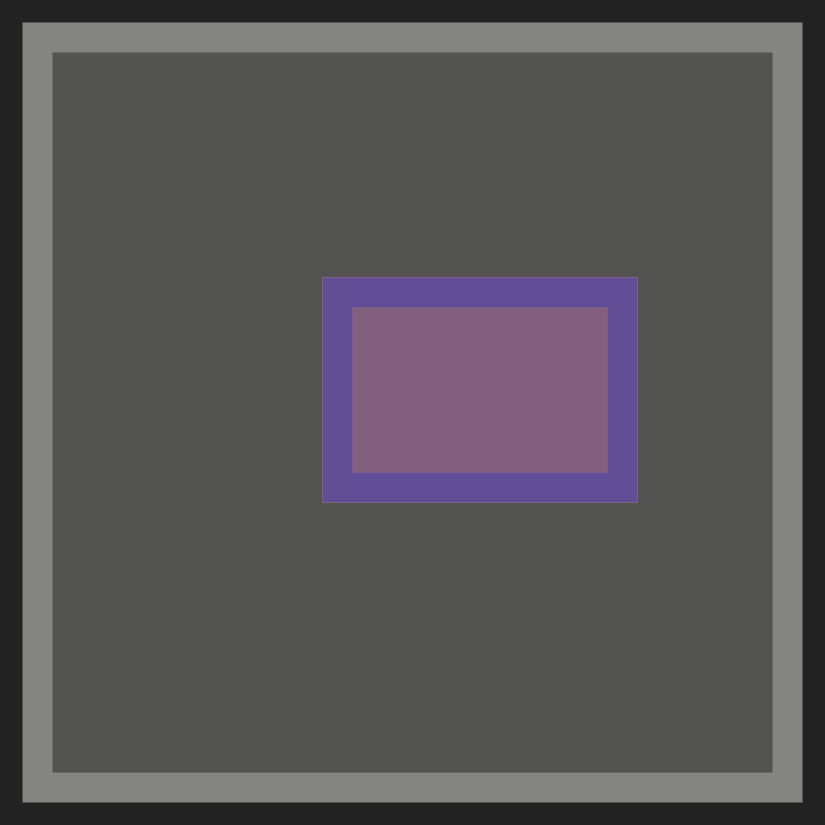

In [50]:
import gdstk
import cairosvg
from IPython.display import Image

library = gdstk.read_gds('cap.gds')
top_cells = library.top_level()
top_cells[0].write_svg('cap.svg')
cairosvg.svg2png(url='cap.svg', write_to='cap.png', scale=30.0)
Image('cap.png')

## Simulate the MOFSET with PySpice

In [53]:
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *
import matplotlib.pyplot as plt

circuit = Circuit('ringosc')
circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'tt')
circuit.include('nmosfet.spice')
circuit.include('pmosfet.spice')
circuit.X('nmosfet0', 'nmosfet', 'DRAIN0', 'DRAIN2', 'VGND', 'VGND')
circuit.X('nmosfet1', 'nmosfet', 'DRAIN1', 'DRAIN0', 'VGND', 'VGND')
circuit.X('nmosfet2', 'nmosfet', 'DRAIN2', 'DRAIN1', 'VGND', 'VGND')
circuit.X('pmosfet0', 'pmosfet', 'DRAIN0', 'DRAIN2', 'VPWR', 'VPWR')
circuit.X('pmosfet1', 'pmosfet', 'DRAIN1', 'DRAIN0', 'VPWR', 'VPWR')
circuit.X('pmosfet2', 'pmosfet', 'DRAIN2', 'DRAIN1', 'VPWR', 'VPWR')
circuit.V('gnd', 'VGND', 0, 0)
circuit.V('dd', 'VPWR', 'VGND', 1.8)
#circuit.R('0', 'VPWR', 'DRAIN0', '5k')
#circuit.R('1', 'VPWR', 'DRAIN1', '5k')
#circuit.R('2', 'VPWR', 'DRAIN2', '5k')
#circuit.C('1', 'DRAIN0', 'VGND', '1f')
#circuit.C('2', 'DRAIN1', 'VGND', '1f')
#circuit.C('3', 'DRAIN2', 'VGND', '1f')
#circuit.PulseVoltageSource('Vin', 'GATE0', 'VGND',
#                           initial_value=0@u_V, pulsed_value=1.8@u_V,
#                           rise_time=10@u_ps, fall_time=10@u_ps,
#                           pulse_width=1@u_ns, period=2@u_ns, delay_time=1@u_ns)
print(str(circuit))
simulator = circuit.simulator()
analysis = simulator.transient(step_time=1@u_ps, end_time=3@u_ns)
print('done')


.title ringosc
.include /content/nmosfet.spice
.include /content/pmosfet.spice
.lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt
Xnmosfet0 DRAIN0 DRAIN2 VGND VGND nmosfet
Xnmosfet1 DRAIN1 DRAIN0 VGND VGND nmosfet
Xnmosfet2 DRAIN2 DRAIN1 VGND VGND nmosfet
Xpmosfet0 DRAIN0 DRAIN2 VPWR VPWR pmosfet
Xpmosfet1 DRAIN1 DRAIN0 VPWR VPWR pmosfet
Xpmosfet2 DRAIN2 DRAIN1 VPWR VPWR pmosfet
Vgnd VGND 0 0
Vdd VPWR VGND 1.8

done


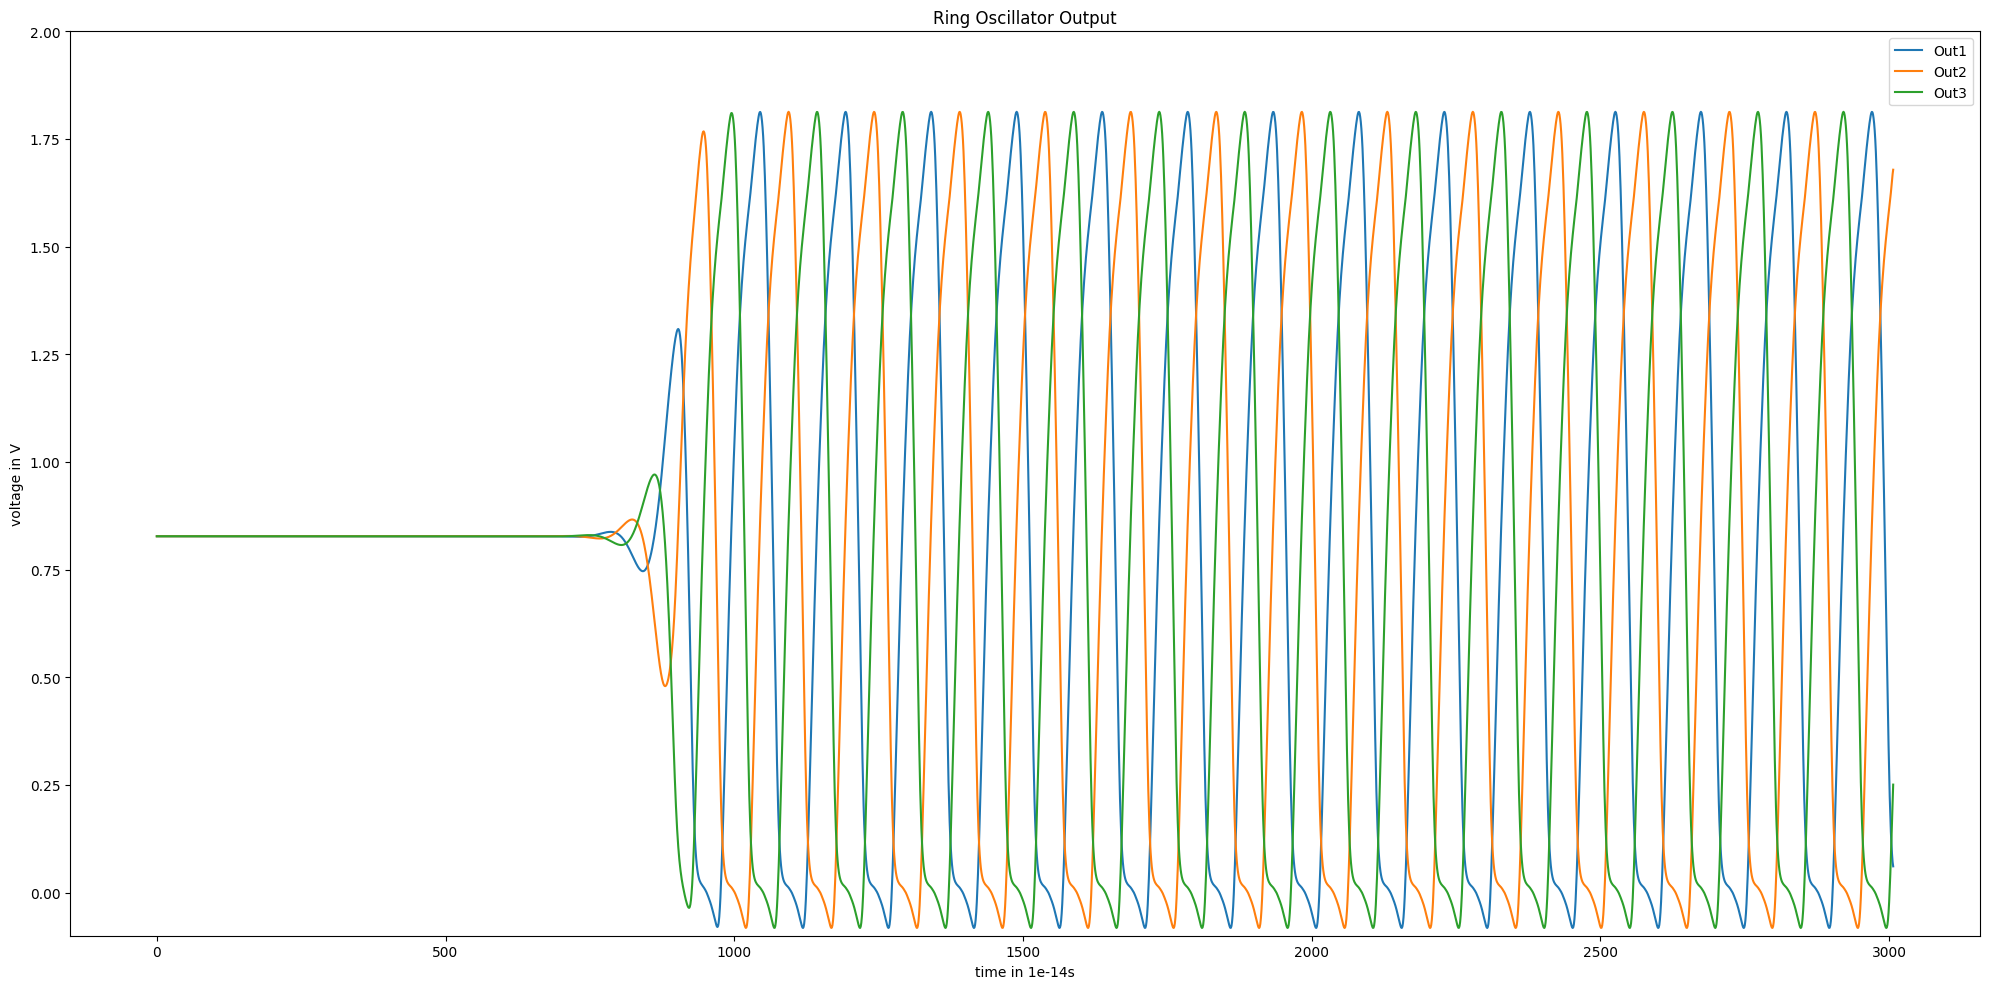

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Ring Oscillator Output')
ax.set_xlabel('time in 1e-14s')
ax.set_ylabel('voltage in V')
ax.plot(analysis.DRAIN0)
ax.plot(analysis.DRAIN2)
ax.plot(analysis.DRAIN1)
ax.legend(('Out1', 'Out2', 'Out3'))
plt.tight_layout()
plt.ylim(-0.1, 2)
plt.show()

## Thus we have designed the Prelayout simulation of the Ring Oscillator with Frequency as shown in the waveform.

# Note: Layout will be done in sometime

# References:


1.   B. Razavi, "The Ring Oscillator [A Circuit for All Seasons]," in IEEE Solid-State Circuits Magazine, vol. 11, no. 4, pp. 10-81, Fall 2019, doi: 10.1109/MSSC.2019.2939771.
2.   https://colab.research.google.com/github/chipsalliance/silicon-notebooks/blob/main/analog-inverter-magic.ipynb
3. https://github.com/chipsalliance/silicon-notebooks/blob/main/analog-inverter-magic.ipynb



# Tools:
Refer to these [Dependencies](https://colab.research.google.com/drive/12SNBuzq0dZnGcng46-IhA3Jl0-DmWcqp#scrollTo=xXTLUi3t9Ez7).